In [1]:
import os
import cv2
import numpy as np
import time
from tqdm import tqdm
from utils import *
from lxml import etree
from matplotlib import pyplot as plt

In [2]:
## Set pyplot figure size
plt.rcParams['figure.figsize'] = [20, 20]

In [3]:
PATH_TO_IMAGE_FOLDER = r'C:\Users\starc\PycharmProjects\TableBank-Recognition-Processing\images'
PATH_TO_ORIGINAL_ANNOTATIONS = r'C:\Users\starc\PycharmProjects\TableBank-Recognition-Processing\original_annotations'
PATH_TO_DESTINATION_ANNOTATIONS = r'C:\Users\starc\PycharmProjects\TableBank-Recognition-Processing\annotations'

In [4]:
# Setup paths
file = '1491745306328040082_35'
image_path = os.path.join(PATH_TO_IMAGE_FOLDER, file + '.png')
original_annotation_xml = os.path.join(PATH_TO_ORIGINAL_ANNOTATIONS, file + '.xml')
destination_annotation_xml = os.path.join(PATH_TO_DESTINATION_ANNOTATIONS, file + '.xml')

In [5]:
xml = open(original_annotation_xml).read()
# Skip advanced table for later
if advanced_table_check(xml):
    print('Advanced!')

In [6]:
# Read original annotations
total_cells, total_cells_non_empty, rows_ann = count_cells(original_annotation_xml)
max_columns = -1
max_visible_columns = -1
for row_ann in rows_ann:
    if len(row_ann) > max_columns:
        max_columns = len(row_ann)
    if row_ann.count('tdy') > max_visible_columns:
        max_visible_columns = row_ann.count('tdy')

In [7]:
total_cells, total_cells_non_empty, rows_ann

(30,
 30,
 [['tdy', 'tdy', 'tdy', 'tdy', 'tdy', 'tdy', 'tdy', 'tdy', 'tdy', 'tdy'],
  ['tdy', 'tdy', 'tdy', 'tdy', 'tdy', 'tdy', 'tdy', 'tdy', 'tdy', 'tdy'],
  ['tdy', 'tdy', 'tdy', 'tdy', 'tdy', 'tdy', 'tdy', 'tdy', 'tdy', 'tdy']])

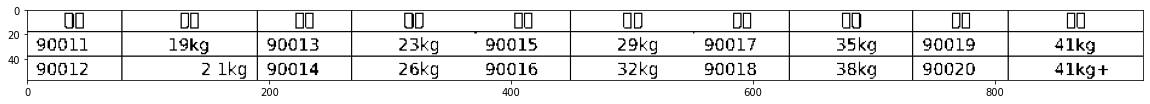

In [8]:
# Read and threshold image
img = cv2.imread(image_path, 0)  # Read image as grayscale
#_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
_, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

plt.imshow(binary, cmap='gray')
plt.show()

In [9]:
template = cv2.imread('missing_font_template.png', 0)

0.6536415219306946


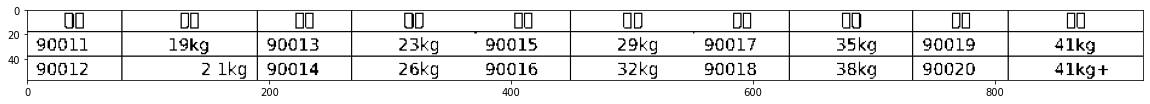

In [13]:
threshold = 0.8
res = cv2.matchTemplate(binary, template, cv2.TM_CCOEFF_NORMED)
new_image = binary.copy()
h, w = template.shape[:2]
# fake out max_val for first run through loop
count_rect = 0
max_val = 1.0

while max_val > threshold:
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print(max_val)
    if max_val > threshold:
        changed = True
        count_rect += 1
        start_row = max_loc[1] - h // 2 if max_loc[1] - h // 2 >= 0 else 0
        end_row = max_loc[1] + h // 2 + 1 if max_loc[1] + h // 2 + 1 <= res.shape[0] else res.shape[0]
        start_col = max_loc[0] - w // 2 if max_loc[0] - w // 2 >= 0 else 0
        end_col = max_loc[0] + w // 2 + 1 if max_loc[0] + w // 2 + 1 <= res.shape[1] else res.shape[0]
        print(start_row, end_row, start_col, end_col)
        res[start_row : end_row, start_col : end_col] = 0   
        new_image = cv2.rectangle(new_image,(max_loc[0], max_loc[1]), (max_loc[0] + w + 1, max_loc[1] + h + 1), 0)

plt.imshow(new_image, cmap='gray')
plt.show()

In [ ]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [ ]:
min_val, max_val, min_loc, max_loc

In [ ]:
start_row = max_loc[1] - h // 2 if max_loc[1] - h // 2 >= 0 else 0
end_row = max_loc[1] + h // 2 + 1 if max_loc[1] + h // 2 + 1 <= res.shape[0] else res.shape[0]
start_col = max_loc[0] - w // 2 if max_loc[0] - w // 2 >= 0 else 0
end_col = max_loc[0] + w // 2 + 1 if max_loc[0] + w // 2 + 1 <= res.shape[1] else res.shape[0]

In [ ]:
print(start_row, end_row, start_col, end_col)